In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [83]:
data = pd.read_excel(r'C:\Users\ahmed\Downloads\2019 Winter Data Science Intern Challenge Data Set.xlsx')
data

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56.190
1,2,92,925,90,1,cash,2017-03-03 17:38:51.999
2,3,44,861,144,1,cash,2017-03-14 04:23:55.595
3,4,18,935,156,1,credit_card,2017-03-26 12:43:36.649
4,5,18,883,156,1,credit_card,2017-03-01 04:35:10.773
...,...,...,...,...,...,...,...
4995,4996,73,993,330,2,debit,2017-03-30 13:47:16.597
4996,4997,48,789,234,2,cash,2017-03-16 20:36:16.389
4997,4998,56,867,351,3,cash,2017-03-19 05:42:42.228
4998,4999,60,825,354,2,credit_card,2017-03-16 14:51:18.188


In [84]:
data.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


In [85]:
# Based on the description of the data above, you can tell that the data is highly skewed. If you look at 'order_amount', 
# the mean is 3145.13, however the mediam is 284. I'm now going to dig a bit deeper into this descripency. 


In [86]:
# AOV seems to be the average of the order amount. The question is, why does is the average order value so high

In [87]:
data1 = data[['order_amount','total_items']]
data1

,order_amount,total_items
0,224,2
1,90,1
2,144,1
3,156,1
4,156,1
...,...,...
4995,330,2
4996,234,2
4997,351,3
4998,354,2


In [88]:
data1.groupby(['total_items'])['order_amount'].count()


total_items
1       1830
2       1832
3        941
4        293
5         77
6          9
8          1
2000      17
Name: order_amount, dtype: int64

In [89]:
#After grouping the number of items purchase, it makes sense that most purchases were 1 or 2 items, but what makes little sense
#is that there were 17 different purchases of 2000 items. Initially that looks like whats altering the AOV, so lets dig a bit deeper

In [90]:
# lets try to find the average order value of all the stores combined, initially combining the revenue of all stores to make total revenue
# then we can combine the total items, and then divide both sums. 

In [114]:
data.loc['Total',:]= data.sum(axis=0)
data['item_price'] = data['order_amount']/data['total_items']
data.is_copy = False
data

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,item_price
0,1.0,53.0,746.0,224.0,2.0,cash,2017-03-13 12:36:56.190,112.000000
1,2.0,92.0,925.0,90.0,1.0,cash,2017-03-03 17:38:51.999,90.000000
2,3.0,44.0,861.0,144.0,1.0,cash,2017-03-14 04:23:55.595,144.000000
3,4.0,18.0,935.0,156.0,1.0,credit_card,2017-03-26 12:43:36.649,156.000000
4,5.0,18.0,883.0,156.0,1.0,credit_card,2017-03-01 04:35:10.773,156.000000
...,...,...,...,...,...,...,...,...
4996,4997.0,48.0,789.0,234.0,2.0,cash,2017-03-16 20:36:16.389,117.000000
4997,4998.0,56.0,867.0,351.0,3.0,cash,2017-03-19 05:42:42.228,117.000000
4998,4999.0,60.0,825.0,354.0,2.0,credit_card,2017-03-16 14:51:18.188,177.000000
4999,5000.0,44.0,734.0,288.0,2.0,debit,2017-03-18 15:48:18.205,144.000000


In [92]:
# the combined average of each item is $357.92, which makes a little more sense as the average order value. 

In [93]:
# Now lets group by the shops and get the average order amount and total items purchased of each shop

In [108]:
shops = data.groupby(['shop_id']).mean()
shops.head(45)

,order_id,user_id,order_amount,total_items,item_price
shop_id,,,,,
1,2514.568182,833.613636,308.818182,1.954545,158.0
2,2299.054545,861.272727,174.327273,1.854545,94.0
3,2305.875000,847.708333,305.250000,2.062500,148.0
4,2747.607843,866.450980,258.509804,2.019608,128.0
5,2498.288889,862.222222,290.311111,2.044444,142.0
6,2431.915254,844.372881,383.508475,2.050847,187.0
7,2595.107143,847.160714,218.000000,1.946429,112.0
8,3013.000000,868.086957,241.043478,1.826087,132.0
9,2716.203390,846.627119,234.000000,1.983051,118.0


In [95]:
# After grouping the data by shop_id and taking average, we can see a clear outlier in the order amount and total items of shop 42

In [96]:
# After looking at the item price, the item price of shop 42, is about double the other stores. 

In [97]:
# Now lets dig a little deeper within shop 42

In [98]:
shop_42 = data.loc[data['shop_id'] == 42]
shop_42

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,item_price
15,16,42,607,704000,2000,credit_card,2017-03-07 04:00:00.000,352.0
40,41,42,793,352,1,credit_card,2017-03-24 14:15:40.649,352.0
60,61,42,607,704000,2000,credit_card,2017-03-04 04:00:00.000,352.0
308,309,42,770,352,1,credit_card,2017-03-11 18:14:38.774,352.0
409,410,42,904,704,2,credit_card,2017-03-04 14:32:57.621,352.0
520,521,42,607,704000,2000,credit_card,2017-03-02 04:00:00.000,352.0
834,835,42,792,352,1,cash,2017-03-25 21:31:24.596,352.0
835,836,42,819,704,2,cash,2017-03-09 14:15:15.136,352.0
938,939,42,808,1056,3,credit_card,2017-03-13 23:43:45.330,352.0
979,980,42,744,352,1,debit,2017-03-12 13:09:03.570,352.0


In [99]:
# After looking at the data for specifically shop 42, we notice that there is a similar order amount of 704,000 and 
# total items in orders of 2000, in many of the purchases. Lets dig a bit deeper in these specific purchases

In [100]:
shop_42_ususual_purchase = shop_42.loc[shop_42['total_items'] == 2000] 
shop_42_ususual_purchase


,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,item_price
15,16,42,607,704000,2000,credit_card,2017-03-07 04:00:00,352.0
60,61,42,607,704000,2000,credit_card,2017-03-04 04:00:00,352.0
520,521,42,607,704000,2000,credit_card,2017-03-02 04:00:00,352.0
1104,1105,42,607,704000,2000,credit_card,2017-03-24 04:00:00,352.0
1362,1363,42,607,704000,2000,credit_card,2017-03-15 04:00:00,352.0
1436,1437,42,607,704000,2000,credit_card,2017-03-11 04:00:00,352.0
1562,1563,42,607,704000,2000,credit_card,2017-03-19 04:00:00,352.0
1602,1603,42,607,704000,2000,credit_card,2017-03-17 04:00:00,352.0
2153,2154,42,607,704000,2000,credit_card,2017-03-12 04:00:00,352.0
2297,2298,42,607,704000,2000,credit_card,2017-03-07 04:00:00,352.0


In [101]:
# By intially scanning the data, we can see that all these purchases are by the same shop (shop_id), and they are also done at 
# 4 am exactly. So simply by looking at this, we can determine that 1) there is a mistake in the system 2) a customer has an 
# automatic purchase system set up

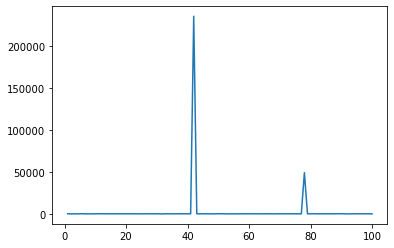

In [103]:
plt.plot(shops.index.values, shops['order_amount'])
plt.show()

<AxesSubplot:xlabel='shop_id', ylabel='order_amount'>

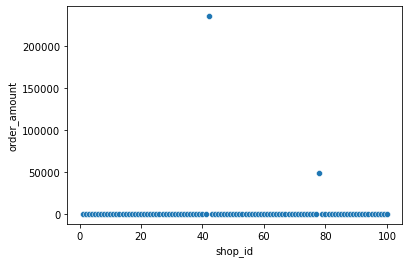

In [112]:
sns.scatterplot(x = shops.index, y = shops['order_amount'])

<AxesSubplot:xlabel='shop_id', ylabel='item_price'>

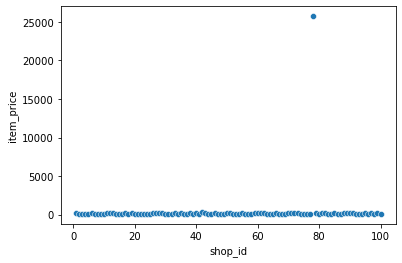

In [113]:
sns.scatterplot(x = shops.index, y = shops['item_price'])

In [ ]:
# After creating this graph, my hypothesis of shop 42 being the outlier seems correct. But now I see another shop in the range
# of 75-80 that also seens to have a skewed order amount

In [109]:
shops[75:80]

,order_id,user_id,order_amount,total_items,item_price
shop_id,,,,,
76,2898.000000,853.785714,321.071429,2.071429,155.0
77,2378.400000,871.180000,280.800000,1.800000,156.0
78,2663.021739,867.739130,49213.043478,1.913043,25725.0
79,2245.870370,850.037037,328.481481,1.814815,181.0
80,2425.244444,865.511111,299.666667,2.066667,145.0


In [ ]:
# Its shop 78. Lets look deeper into it

In [110]:
shop_78 = data.loc[data['shop_id'] == 78]
shop_78

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,item_price
160,161,78,990,25725,1,credit_card,2017-03-12 05:56:56.834,25725.0
490,491,78,936,51450,2,debit,2017-03-26 17:08:18.911,25725.0
493,494,78,983,51450,2,cash,2017-03-16 21:39:35.400,25725.0
511,512,78,967,51450,2,cash,2017-03-09 07:23:13.640,25725.0
617,618,78,760,51450,2,cash,2017-03-18 11:18:41.848,25725.0
691,692,78,878,154350,6,debit,2017-03-27 22:51:43.203,25725.0
1056,1057,78,800,25725,1,debit,2017-03-15 10:16:44.830,25725.0
1193,1194,78,944,25725,1,debit,2017-03-16 16:38:25.551,25725.0
1204,1205,78,970,25725,1,credit_card,2017-03-17 22:32:21.438,25725.0
1259,1260,78,775,77175,3,credit_card,2017-03-27 09:27:19.843,25725.0


In [116]:
shops.describe()

,order_id,user_id,order_amount,total_items,item_price
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,2500.945577,849.271423,3136.834088,8.652863,407.990000
std,197.720965,14.378685,23935.881130,66.590946,2557.462906
min,1992.075000,758.588235,162.857143,1.731707,90.000000
25%,2385.254902,840.863049,263.675962,1.912724,132.750000
50%,2491.960328,848.655850,308.889758,1.981125,153.000000
75%,2639.316327,858.889846,336.628352,2.076250,168.250000
max,3057.675676,872.578947,235101.490196,667.901961,25725.000000


In [ ]:
# Right away we can see the item price is extremely high. This is very unusual. I also notice that the purchase amounts are 
# varying. Its also weird that these purchases are sometimes in cash. 

In [ ]:
## Question 1a.
# From looking at these specific intances in shops 42 and 78, its become clear that these heavy outliers are changing the 
# averages. In shop 42, there are many purchases of $704000 all occurring by the same person at the same exact time on different
# days. In shop 78, the item price is $25725, compared to the average item price of all the shops combined being $357.92.
# In order to evaluate the AOV, it might be best to use a different metric other than average, such as median.

In [ ]:
## Question 1b. 
# We should use median in these case as median doesnt account for drastic outliers which are seen in this dataset


In [ ]:
## Question 1c.
# The median for order amount is $284 and the median for item price is $153